In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas 

from lib import loading

df = loading.load_data()
print("We have {0} labelled examples.".format(len(df)))

Read the data file from ./airline-twitter-sentiment/Tweets.csv
We have 14640 labelled examples.


In [2]:
from lib import processing

training_data, testing_data = processing.process_data(df, sample_size=0.3)

Using a total of 4392 tweets
Training sample size: 3934
Testing sample size: 458


In [3]:
from lib import classify
from nltk.sentiment import SentimentAnalyzer

sentim_analyzer = SentimentAnalyzer()
classify.add_features(training_data, sentim_analyzer)
train, test = classify.extract_features(training_data, testing_data, sentim_analyzer)

def evaluate_trainer(trainer):
    classifier, evaluation, _ = classify.train_model(train, test, sentim_analyzer, trainer)
    return {
        'classifier': classifier,
        'evaluation': evaluation,
        'trainer': trainer,
    }

Unigram features 664
Bigram features:  197


## K Nearest Neighbours

In [4]:
from nltk.classify import SklearnClassifier
from sklearn.neighbors import KNeighborsClassifier

evaluations = []
k_range = [3, 5, 10, 15]
for k in k_range: 
    trainer = {
        "name": "K Nearest Neighbours Classifier",
        "train": SklearnClassifier(KNeighborsClassifier(
                n_neighbors = k,
                n_jobs = -1,
                weights = "distance")).train,
    }
    print("Training with k = ", k)
    evaluations.append(evaluate_trainer(trainer))



Training with k =  3
Training: K Nearest Neighbours Classifier
Training classifier
Evaluating SklearnClassifier results...
Training with k =  5
Training: K Nearest Neighbours Classifier
Training classifier
Evaluating SklearnClassifier results...
Training with k =  10
Training: K Nearest Neighbours Classifier
Training classifier
Evaluating SklearnClassifier results...
Training with k =  15
Training: K Nearest Neighbours Classifier
Training classifier
Evaluating SklearnClassifier results...


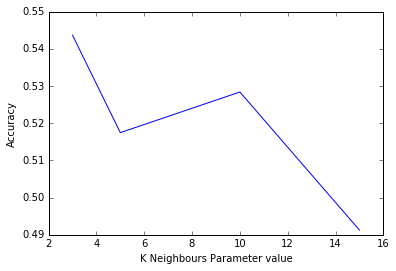

In [5]:
accuracies = [e['evaluation']['Accuracy'] for e in evaluations]
plt.plot(k_range, accuracies)
plt.xlabel("K Neighbours Parameter value")
plt.ylabel("Accuracy")

# Concluzie

### Valoarea optima pentru cei mai apropiati  k vecini este 3.

In [8]:
k = 3
trainer = {
    "name": "K Nearest Neighbours Classifier",
    "train": SklearnClassifier(KNeighborsClassifier(n_neighbors = k)).train,
    "weights": "distance",
}
evaluation = evaluate_trainer(trainer)

Training: K Nearest Neighbours Classifier
Training classifier
Evaluating SklearnClassifier results...


In [9]:
## TODO try pca reduction.

print(evaluation['evaluation'])

{'F-measure [positive]': 0.45544554455445546, 'Precision [negative]': 0.7689243027888446, 'F-measure [neutral]': 0.3076923076923077, 'Recall [positive]': 0.42592592592592593, 'F-measure [negative]': 0.6795774647887325, 'Recall [negative]': 0.6088328075709779, 'Precision [positive]': 0.48936170212765956, 'Recall [neutral]': 0.4367816091954023, 'Precision [neutral]': 0.2375, 'Accuracy': 0.5545851528384279}
